# Library

In [269]:
import numpy as np
import seaborn as sns
import pandas as pd

from numpy import unique
from numpy import where
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans,MiniBatchKMeans,OPTICS,AffinityPropagation

### Importation des données 

In [21]:
df =  pd.read_csv("C:\\Users\\actou\\OneDrive\\Documents\\IODAA\\Notebook_ML\\Notebook_ML_IODAA_2022\\CC GENERAL.csv")

### Exploration du dataset

In [22]:
print("--> Le nombre de lignes est :", df.shape[0])
print("--> Le nombre de colonnes est :", df.shape[1])
print("----------")
df.describe()

--> Le nombre de lignes est : 8950
--> Le nombre de colonnes est : 18
----------


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Informations générales 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Compter le nombre d'éléments distincts dans l'axe spécifié.

In [24]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

##### Calculer la corrélation par paires des colonnes, à l'exclusion des valeurs NA/null.

In [25]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Text(0.5, 1.0, 'Color Masked Heatmap of Correlations')

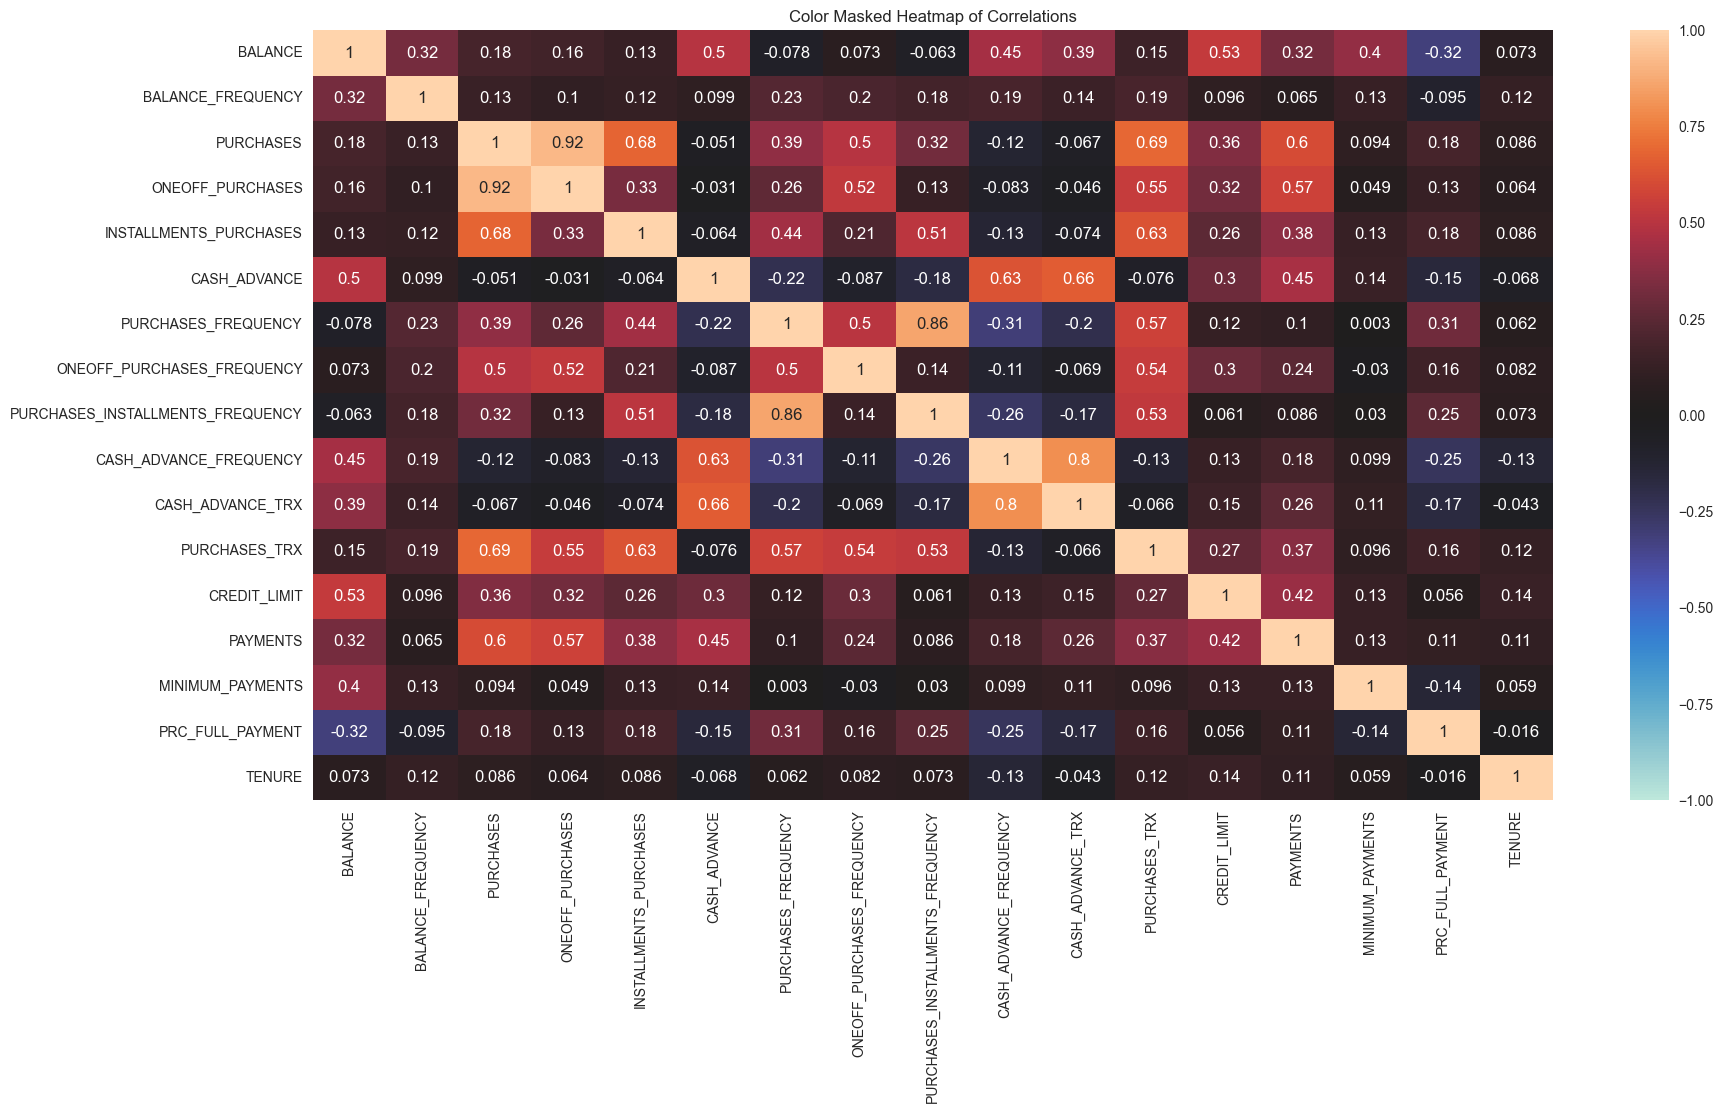

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.title('Color Masked Heatmap of Correlations')

<span style="color:orange"> 
Valeurs manquantes dans les colonnes : MINIMUM_PAYMENTS et CREDIT_LIMIT </span>

### Prétraitement

##### Nettoyage des données 

<span style="color:orange"> Les données manquantes représentent 3,5 % du dataset </span>

In [27]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
###APPROCHE 1 = supprimeer les lignes 
df_new = df.dropna(axis=0)
df_new.reset_index()
df_new.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
df_new.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
#### APPROCHE 2 : remplacr par la valeur médiane de la colonne 
df_med= df.fillna( df.median() )
df_med.describe()

C:\Users\actou\AppData\Local\Temp\ipykernel_13752\2334215379.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_med= df.fillna( df.median() )


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [31]:
df_med.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<span style="color:orange"> Le nombre total de lignes sur l'ensemble de données devient 8636 lignes. </span>

##### Suppression des colonnes itnutiles
<span style="color:orange"> -->  Suppression de la colonne "CUST_ID". </span>


In [32]:
df_new.drop("CUST_ID",axis=1,inplace=True)

C:\Users\actou\AppData\Local\Temp\ipykernel_13752\2114207913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop("CUST_ID",axis=1,inplace=True)


##### ENCODAGE 
ci-besoin 

In [33]:
from sklearn import preprocessing
def onhotencoding(colonne):
        oh = preprocessing.OneHotEncoder()
        for i in df[colonne]:
            df[:,i] = oh.fit_transform(df[:,i])


### Outlier : detection et décisions

##### Detection manuelle 

In [34]:
liste_1_5,liste_2,liste_i,liste_1_2=[],[],[],[]

for i in df_new:
    Q3 = df_new[i].quantile(0.75)
    Q1 = df_new[i].quantile(0.25)
    IQ =  Q3 - Q1
    
    if df_new[(df_new[i] > (Q3 + 1.2*IQ)) | (df_new[i] < (Q1 - 1.2*IQ))].any(axis=None):
        liste_1_2.append('OUI')
    else:
        liste_1_2.append('NON')

    if df_new[(df_new[i] > (Q3 + 1.5*IQ)) | (df_new[i] < (Q1 - 1.5*IQ))].any(axis=None):
        liste_1_5.append('OUI')
    else:
        liste_1_5.append('NON')

    if df_new[(df_new[i] > (Q3 + 2*IQ)) | (df_new[i] < (Q1 - 2*IQ))].any(axis=None):
        liste_2.append('OUI')
    else:
        liste_2.append('NON')



In [35]:
nom_des_colonnes=pd.DataFrame(df_new).columns.values

outlier_df  = pd.DataFrame({'colonnes':nom_des_colonnes,'Seuil 1.2':liste_1_2,'Seuil 1.5':liste_1_5,'Seuil 2':liste_2})
print(outlier_df)

                            colonnes Seuil 1.2 Seuil 1.5 Seuil 2
0                            BALANCE       OUI       OUI     OUI
1                  BALANCE_FREQUENCY       OUI       OUI     OUI
2                          PURCHASES       OUI       OUI     OUI
3                   ONEOFF_PURCHASES       OUI       OUI     OUI
4             INSTALLMENTS_PURCHASES       OUI       OUI     OUI
5                       CASH_ADVANCE       OUI       OUI     OUI
6                PURCHASES_FREQUENCY       NON       NON     NON
7         ONEOFF_PURCHASES_FREQUENCY       OUI       OUI     OUI
8   PURCHASES_INSTALLMENTS_FREQUENCY       NON       NON     NON
9             CASH_ADVANCE_FREQUENCY       OUI       OUI     OUI
10                  CASH_ADVANCE_TRX       OUI       OUI     OUI
11                     PURCHASES_TRX       OUI       OUI     OUI
12                      CREDIT_LIMIT       OUI       OUI     OUI
13                          PAYMENTS       OUI       OUI     OUI
14                  MINIM

<span style="color:orange"> Pour ce seuil : 15/17 colonnes ont des valeurs aberrantes pour les trois seuils testés  </span>

<AxesSubplot:xlabel='BALANCE'>

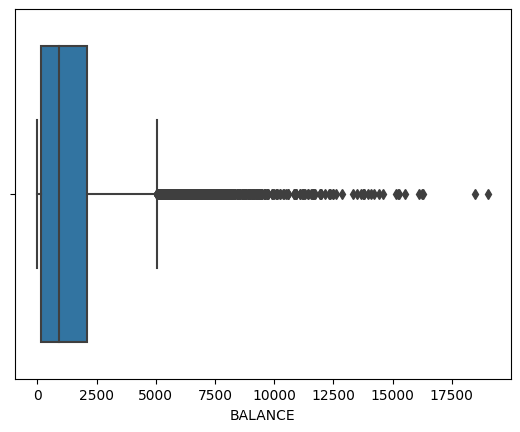

In [36]:
sns.boxplot(x=df_new["BALANCE"])

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

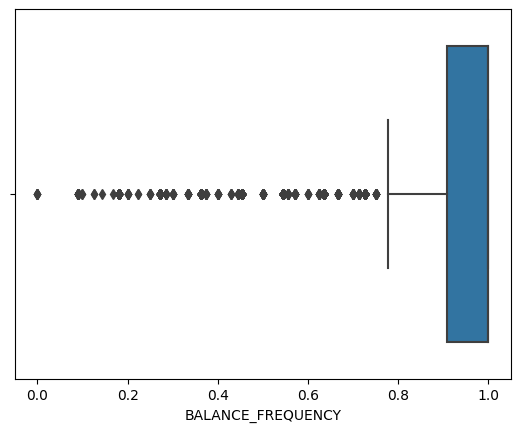

In [37]:

sns.boxplot(x=df_new["BALANCE_FREQUENCY"])

##### Approche statistique (Z-score = 3 )

In [38]:
liste_Z = []

mean = np.mean(df_new)
std = np.std(df_new)
df_outlier = df_new[np.abs(df_new - mean) > 3 * std]
df_outlier.describe()

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,186.000000,168.000000,129.000000,121.000000,130.000000,177.000000,0.0,0.0,0.0,196.000000,153.000000,180.000000,149.000000,154.000000,100.000000,0.0,361.000000
mean,10066.935998,0.163092,13422.364729,10695.469835,5599.157154,11161.322965,NaN,NaN,NaN,0.856008,37.973856,137.005556,17880.872483,17536.176837,17334.556950,NaN,6.490305
std,2176.829195,0.048724,7861.590184,6966.504853,3041.341039,4904.192234,NaN,NaN,NaN,0.110843,18.758839,54.192755,2415.347866,7854.905222,11823.374437,NaN,0.500600
min,7888.028118,0.000000,7553.480000,5742.610000,3173.500000,7362.379262,NaN,NaN,NaN,0.750000,25.000000,91.000000,15500.000000,10664.658660,8096.795020,NaN,6.000000
25%,8544.293900,0.181818,8710.720000,6598.290000,3777.255000,8362.154254,NaN,NaN,NaN,0.750000,27.000000,101.000000,16500.000000,11652.778727,10427.206920,NaN,6.000000
50%,9306.596348,0.181818,10410.490000,7958.960000,4290.080000,9670.775878,NaN,NaN,NaN,0.833333,31.000000,116.500000,17500.000000,14332.194585,13096.382430,NaN,6.000000
75%,11081.991935,0.181818,13771.630000,11146.280000,6211.625000,11834.205810,NaN,NaN,NaN,0.916667,42.000000,151.000000,18500.000000,20479.713017,19156.264442,NaN,7.000000
max,19043.138560,0.250000,49039.570000,40761.250000,22500.000000,47137.211760,NaN,NaN,NaN,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,NaN,7.000000


In [39]:
df_filtered = df_new[np.abs(df_new - mean) <= 3 * std]
df_filtered.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8450.000000,8468.000000,8507.000000,8515.000000,8506.000000,8459.000000,8636.000000,8636.000000,8636.000000,8440.000000,8483.000000,8456.000000,8487.000000,8482.000000,8536.000000,8636.000000,8275.000000
mean,1414.879062,0.909556,837.447031,461.512269,341.701660,781.433462,0.496000,0.205909,0.368820,0.120921,2.688789,12.436850,4287.560755,1498.488756,671.354474,0.159304,11.754441
std,1664.893898,0.181951,1213.035741,851.801421,545.681944,1373.243025,0.401273,0.300054,0.398093,0.170636,4.503142,16.183704,3214.806672,1708.950572,926.273933,0.296271,0.790093
min,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,8.000000
25%,139.464892,0.909091,37.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,411.864961,168.527355,0.000000,12.000000
50%,876.187459,1.000000,362.480000,35.000000,87.105000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,874.022731,305.230384,0.000000,12.000000
75%,1965.850092,1.000000,1083.080000,547.175000,456.282500,1028.763963,0.916667,0.333333,0.750000,0.166667,4.000000,16.000000,6000.000000,1874.563218,790.612931,0.166667,12.000000
max,7886.875682,1.000000,7479.950000,5506.810000,3165.820000,7313.203925,1.000000,1.000000,1.000000,0.727273,24.000000,90.000000,15000.000000,10496.241660,7960.080674,1.000000,12.000000


In [40]:
df_filtered.isna().sum()

BALANCE                             186
BALANCE_FREQUENCY                   168
PURCHASES                           129
ONEOFF_PURCHASES                    121
INSTALLMENTS_PURCHASES              130
CASH_ADVANCE                        177
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY              196
CASH_ADVANCE_TRX                    153
PURCHASES_TRX                       180
CREDIT_LIMIT                        149
PAYMENTS                            154
MINIMUM_PAYMENTS                    100
PRC_FULL_PAYMENT                      0
TENURE                              361
dtype: int64

In [41]:
trainset = df_filtered.dropna(axis=0)
trainset.reset_index()
trainset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000,7190.000000
mean,1305.183118,0.906173,769.718982,439.035182,330.957469,686.998115,0.493971,0.195277,0.364969,0.112739,2.394854,12.356606,4024.607065,1331.206601,594.079236,0.156272,11.753408
std,1532.832201,0.186792,1040.179702,802.998504,514.629900,1252.774832,0.396574,0.289466,0.394028,0.161128,4.063860,15.334040,2958.877448,1441.670045,793.118491,0.291047,0.793087
min,0.004816,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.037744,0.000000,8.000000
25%,135.057748,0.909091,49.860000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,416.831154,169.343409,0.000000,12.000000
50%,832.479217,1.000000,374.875000,38.325000,96.820000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,8.000000,3000.000000,828.532110,289.983375,0.000000,12.000000
75%,1797.165015,1.000000,1044.372500,537.405000,453.647500,908.355285,0.916667,0.250000,0.750000,0.166667,3.000000,17.000000,6000.000000,1660.307074,708.174455,0.166667,12.000000
max,7886.875682,1.000000,7323.380000,5497.040000,3165.820000,7313.203925,1.000000,1.000000,1.000000,0.727273,24.000000,90.000000,15000.000000,10226.601760,7960.080674,1.000000,12.000000


-------------------------------------------------------------------------------

# TEST de plusieurs algorithmes de clustering :
- centroïde : Mini-Batch K-means / K-means 
- densité : OPTICS
- distribution : mélange gaussien 
- propagation d'affinité 

### K-means 

##### Combien de clusters choisir? (WCSS méthode)

In [42]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(trainset)
    wcss.append( kmeans.inertia_ )

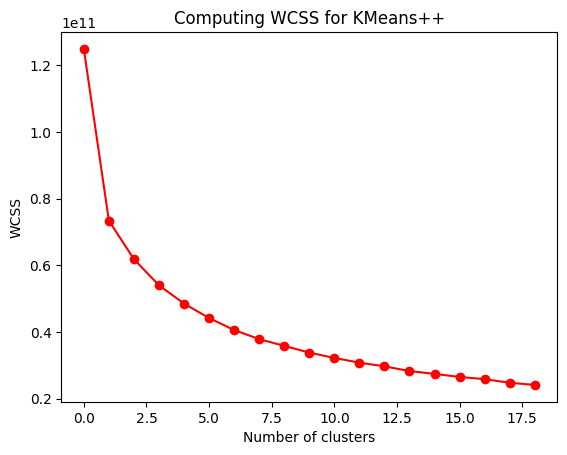

In [43]:
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Le nombre de cluster qui donne la plus petite valeur de WCSS corresond au nombre optimal de clusters: Ici,  cela correspond 18 colonnes soit le nombre de colonnes du dataset. 
Il semble qu'à partir de WSCC = 0.4 soit 6 clusters, WCSS baisse plus lentement, on conserve donc **6 clusters** pour commencer. 

##### Combien de clusters choisir? Silhouette méthode 

In [80]:
from sklearn.metrics import silhouette_score, silhouette_samples
liste_score = []
liste = range(2,20,1)
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    preds = kmeans.fit_predict(trainset)
    centers = kmeans.cluster_centers_

    score = silhouette_score(trainset, preds, metric='euclidean')
    print ("Pour {} cluster, le silhouette score est :  {}".format(i, score))
    liste_score.append(score)

Pour 2 cluster, le silhouette score est :  0.4443853706579281
Pour 3 cluster, le silhouette score est :  0.43445238996765606
Pour 4 cluster, le silhouette score est :  0.3618863340099266
Pour 5 cluster, le silhouette score est :  0.3430881208887086
Pour 6 cluster, le silhouette score est :  0.3252344405646972
Pour 7 cluster, le silhouette score est :  0.3092014341395999
Pour 8 cluster, le silhouette score est :  0.2517805615602911
Pour 9 cluster, le silhouette score est :  0.2569142381013308
Pour 10 cluster, le silhouette score est :  0.2538382496656289
Pour 11 cluster, le silhouette score est :  0.26214591460306685
Pour 12 cluster, le silhouette score est :  0.25981660432046844
Pour 13 cluster, le silhouette score est :  0.2664865068068154
Pour 14 cluster, le silhouette score est :  0.26332145609986735
Pour 15 cluster, le silhouette score est :  0.25664763977556243
Pour 16 cluster, le silhouette score est :  0.2463349585863507
Pour 17 cluster, le silhouette score est :  0.243109786678

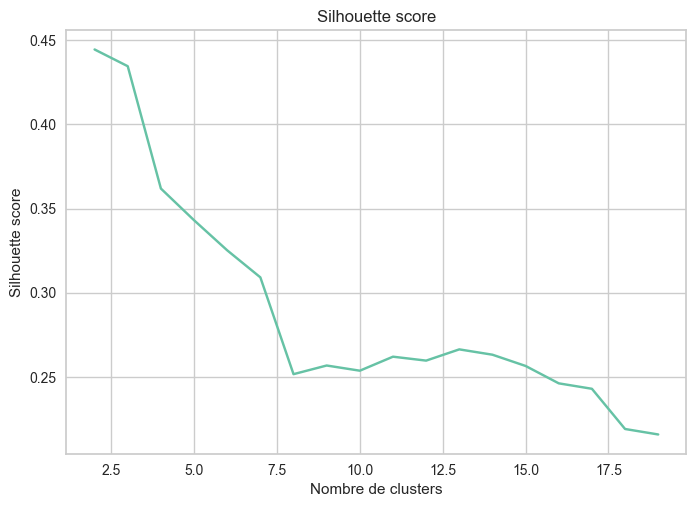

In [81]:
plt.plot(liste,liste_score)
plt.title("Silhouette score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette score")
plt.show()

In [ ]:
model= KMeans(n_clusters=nb_cluster, random_state=300)
visualizer = KElbowVisualizer(model, k=(2,21),metric ='silhouette', timings=False)
visualizer.fit(data_stand) # Fit the training data to the visualizer
visualizer.poof() 

In [120]:
nb_cluster = 6

#### Standardisation des données 

In [121]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler() 
data_stand = df_new.copy() 

for c in df_new.columns.values:
    data_stand[c] = norm.fit_transform(df_new[c].values.reshape(-1,1))
    
data_stand.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_ID,CUST_ID,Cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0,0.0,0.0,0.444444
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0,0.0,0.0,0.166667
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0,0.5,0.5,0.000000
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0,0.0,0.0,0.444444
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0,1.0,1.0,0.388889


In [173]:
nb_cluster = 6
model_kmean= KMeans(n_clusters=nb_cluster, random_state=100)
model_kmean.fit(data_stand)
centers = model_kmean.cluster_centers_
label = model_kmean.labels_

# get results
#model_kmean.labels_
#model_kmean.cluster_centers_

In [ ]:
df_new['CUST_ID'] =model_kmean.labels_
df_new["Cluster"] = model_kmean.fit_predict(df_new)
df_new["Cluster"] = df_new["Cluster"].astype("int")

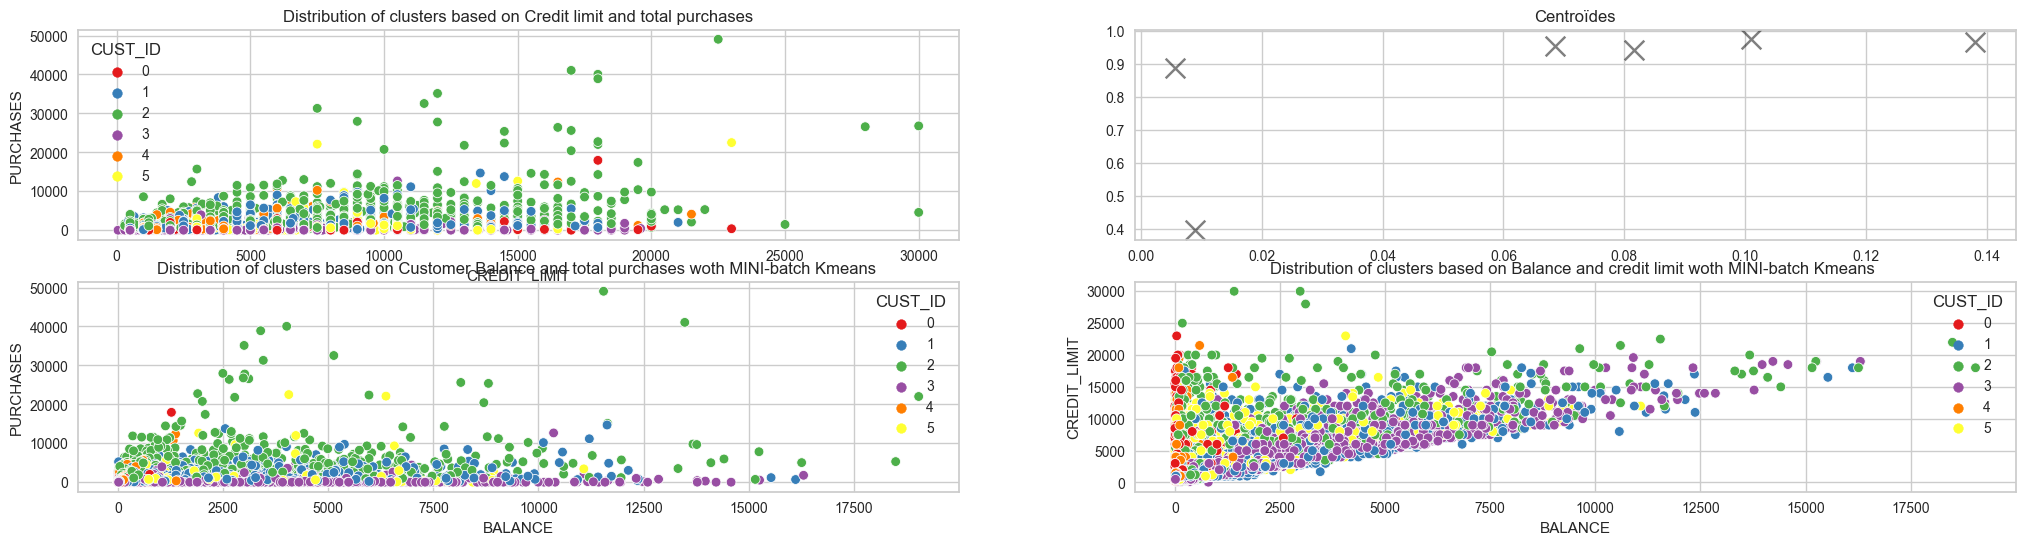

In [195]:
plt.figure(figsize=(25,6))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_new, x='CREDIT_LIMIT', y='PURCHASES', hue='CUST_ID',palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases')

plt.subplot(2, 2,3)
sns.scatterplot(data=df_new, x='BALANCE', y='PURCHASES', hue='CUST_ID',palette='Set1')
plt.title('Distribution of clusters based on Customer Balance and total purchases woth MINI-batch Kmeans ')


plt.subplot(2, 2, 4)
sns.scatterplot(data=df_new, x='BALANCE', y='CREDIT_LIMIT', hue='CUST_ID',palette='Set1')
plt.title('Distribution of clusters based on Balance and credit limit woth MINI-batch Kmeans ')


plt.subplot(2, 2, 2)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker = 'x' )
plt.title('Centroïdes')
plt.show()


--------------------------------------------------------------------------


### MINI-BATCH Kmeans

On conserve le meme nombre de clusters trouvés pour les Kmeans

In [179]:
random_state_seed = 100
nb_cluster = 6 
model= MiniBatchKMeans(n_clusters=nb_cluster, random_state=100)
model.fit(data_stand)

MiniBatchKMeans(n_clusters=6, random_state=100)

In [ ]:
df_new['CUST_ID'] =model.labels_
df_new["Cluster"] = model.fit_predict(df_new)
df_new["Cluster"] = df_new["Cluster"].astype("int")

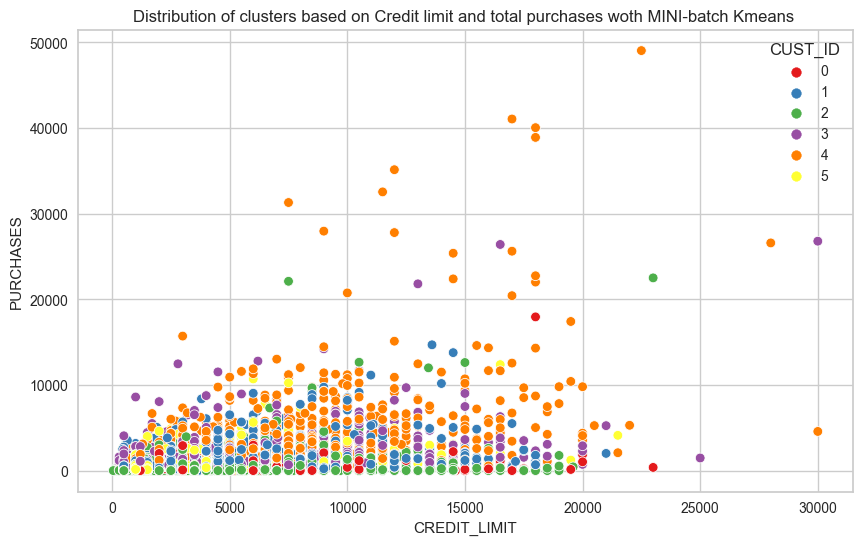

In [197]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_new, x='CREDIT_LIMIT', y='PURCHASES', hue='CUST_ID',palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases woth MINI-batch Kmeans ')
plt.show()

---------------------------------------------------------------------------

### OPTICS

In [220]:
ep_liste,mns_liste,sil_score = [],[],[]
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
min_samples=np.arange(5, 15)
for ep, mns in zip(eps, min_samples):
    dbs=OPTICS(eps=ep, min_samples=mns)
    dbs.fit(data_stand)
    #print("Silhouette Coefficient for eps and min_samples",ep,mns,silhouette_score(data_stand, dbs.labels_))
    sil_score.append(silhouette_score(data_stand, dbs.labels_))
    ep_liste.append(eps)
    mns_liste.append(mns)

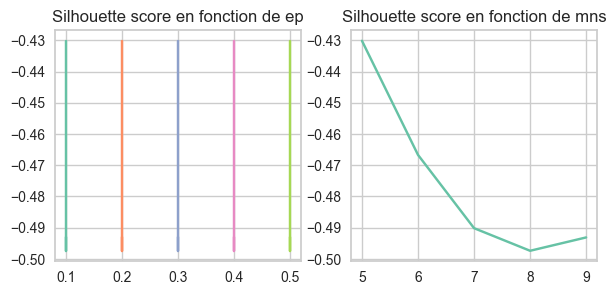

In [222]:
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
plt.plot(ep_liste,sil_score)
plt.title('Silhouette score en fonction de ep')
plt.subplot(1, 2, 2)
plt.plot(mns_liste,sil_score)
plt.title('Silhouette score en fonction de mns')
plt.show()

In [225]:
optics = OPTICS(min_samples=8, max_eps=10, cluster_method='dbscan',metric = "euclidean") 
optics.fit(data_stand)

df_new['CUST_ID'] =optics.labels_
df_new["Cluster"] = optics.fit_predict(df_new)
df_new["Cluster"] = df_new["Cluster"].astype("int")

C:\Users\actou\AppData\Local\Temp\ipykernel_13752\905456365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['CUST_ID'] =optics.labels_
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_optics.py:570: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
C:\Users\actou\AppData\Local\Temp\ipykernel_13752\905456365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

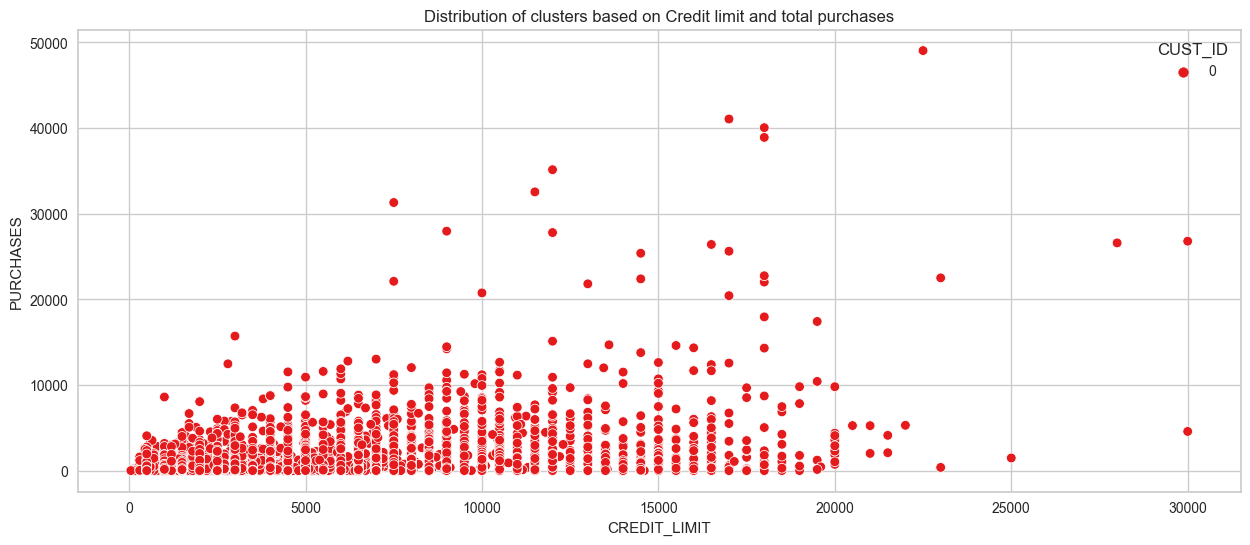

In [226]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df_new, x='CREDIT_LIMIT', y='PURCHASES', hue='CUST_ID',palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

### Gaussian mixture

In [263]:
from sklearn.mixture import GaussianMixture

myData=pd.DataFrame(df_new,columns=['x','y'])
gmm = GaussianMixture(n_components=3)
gmm.fit(df_new)
hue = gmm.predict(df_new)
y_predict_proba=gmm.predict_proba(df_new)
pd.DataFrame(y_predict_proba)

,0,1,2
0,4.068085e-15,0.000208,9.997915e-01
1,1.214538e-07,0.999998,1.795726e-06
2,2.108964e-13,1.000000,4.733200e-91
3,7.176812e-15,0.000173,9.998273e-01
4,3.409195e-11,1.000000,1.837973e-65
...,...,...,...
8631,3.281653e-09,0.000000,1.000000e+00
8632,9.455619e-13,0.000000,1.000000e+00
8633,2.908237e-12,0.000000,1.000000e+00
8634,8.224083e-13,0.000000,1.000000e+00


<AxesSubplot:xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

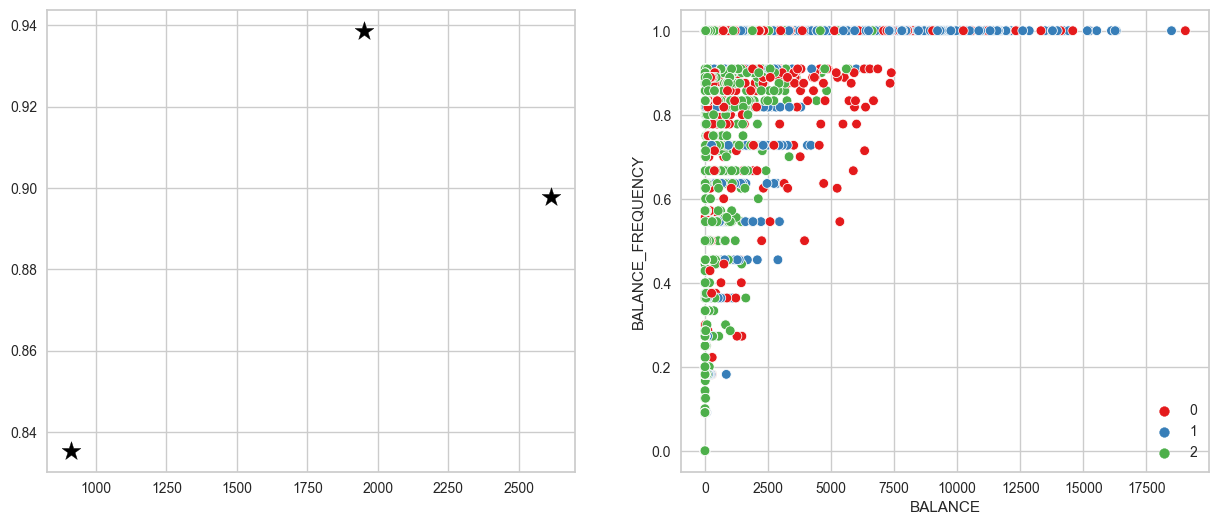

In [266]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='*', s=200, c='black')

plt.subplot(1,2,2)
sns.scatterplot(x = df_new.iloc[:,0],y = df_new.iloc[:,1],hue=gmm.predict(df_new),legend='full', palette='Set1')

### Propagation d'affinité 

In [275]:
affprop= AffinityPropagation(random_state = 5 )
affprop.fit(df_new)
hue = affprop.predict(df_new)
centers = affprop.cluster_centers_
y_predict_proba=affprop.predict_proba(df_new)

AttributeError: 'AffinityPropagation' object has no attribute 'predict_proba'

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(affprop.means_[:,0], affprop.means_[:,1], marker='*', s=200, c='black')

plt.subplot(1,2,2)
sns.scatterplot(x = df_new.iloc[:,0],y = df_new.iloc[:,1],hue=affprop.predict(df_new),legend='full', palette='Set1')